### Bias-Variance Tradeoff Analysis 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Step 1: Generate dataset 
X = np.linspace(-2, 2, 100).reshape(-1, 1)
true_y = X**3 - 0.5 * X
y = true_y + np.random.normal(0, 0.2, X.shape)


In [ ]:
# Step 2: Define bias-variance analysis function
def bias_var_analysis(degree, n_runs=50):
    predictions = []

    for _ in range(n_runs):
        # Sample random noise each run
        noise = np.random.normal(0, 0.2, X.shape)
        y_noisy = true_y + noise

        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)

        model = LinearRegression()
        model.fit(X_poly, y_noisy)
        y_pred = model.predict(X_poly)
        predictions.append(y_pred)

    predictions = np.array(predictions)

    # Calculate average prediction, bias, and variance
    avg_pred = np.mean(predictions, axis=0)
    bias = (avg_pred - true_y.ravel())**2
    variance = np.var(predictions, axis=0)

    # Visualization
    plt.figure(figsize=(10, 6))
    for pred in predictions[:10]:
        plt.plot(X, pred, color='lightgray', alpha=0.5)
    plt.plot(X, true_y, color='green', label='True Function')
    plt.plot(X, avg_pred, color='red', label=f'Avg Prediction (deg={degree})')
    plt.fill_between(X.ravel(), avg_pred - np.sqrt(variance), avg_pred + np.sqrt(variance), 
                     color='orange', alpha=0.3, label='Confidence Interval (1 std)')
    plt.title(f'Bias-Variance Analysis (Degree {degree})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print mean bias and variance
    print(f"Degree {degree}:")
    print(f"Mean Bias^2: {np.mean(bias):.4f}")
    print(f"Mean Variance: {np.mean(variance):.4f}\n")


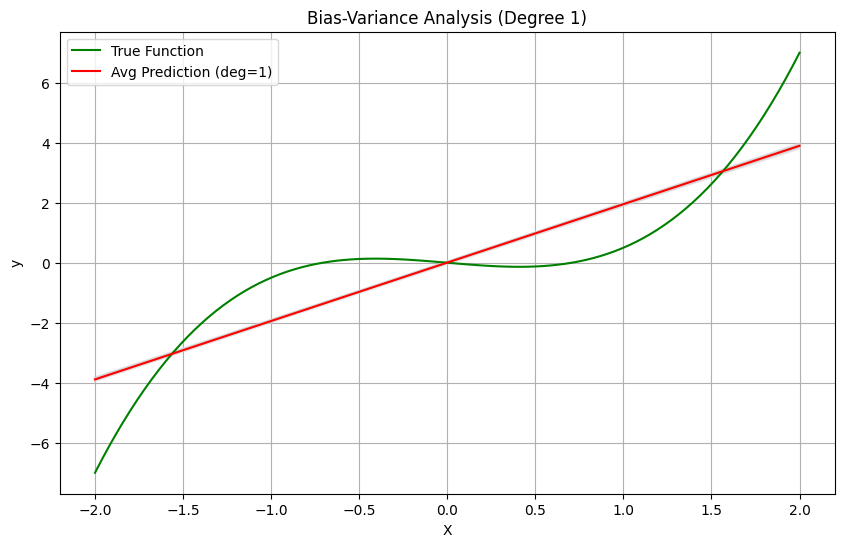

Degree 1:
Mean Bias^2: 11.8707
Mean Variance: 0.0007



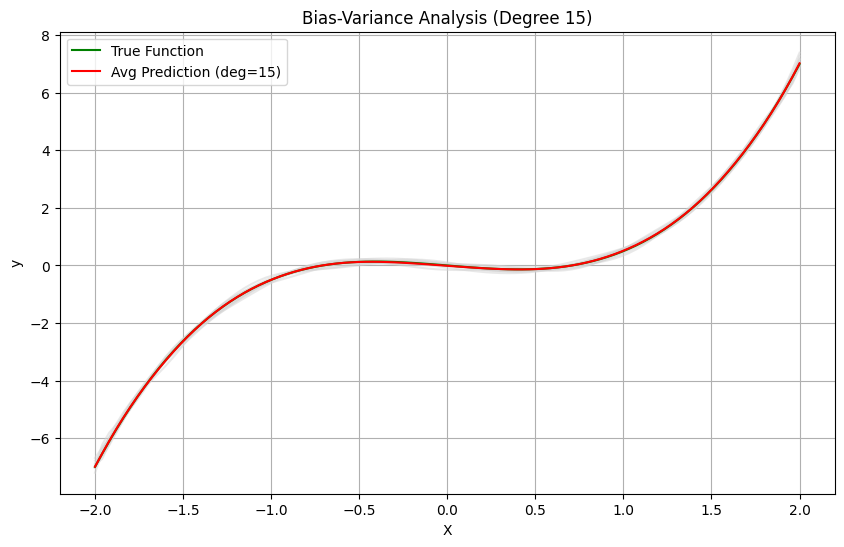

Degree 15:
Mean Bias^2: 13.4376
Mean Variance: 0.0061



In [14]:
# Step 3: Run for degree 1 (simple model) and degree 15 (complex model)
bias_var_analysis(degree=1)   # Underfitting (High Bias)
bias_var_analysis(degree=15)  # Overfitting (High Variance)